<a href="https://colab.research.google.com/github/daniims/data_challenge/blob/main/Daniella_Marthe_ColegioMarymount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto**: **Bancolombia**

**Nombre:** Daniella Marthe

**Institución:** Colegio Marymount Barranquilla

<p><img src="https://cloudfront-us-east-1.images.arcpublishing.com/metroworldnews/IWIHP5KCPZBY7PNXNBTGBGEQGM.png"  width = "200" height = "90" border="0"/ alt="Logo">

<p>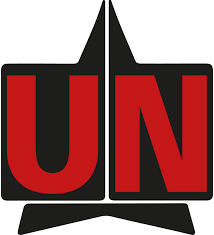

#Introducción

En este informe, abordaremos la tarea crucial de análisis de sentimientos aplicado a un conjunto de noticias proporcionado por Bancolombia. El análisis de sentimientos desempeña un papel esencial en la comprensión de la percepción pública y puede ser un recurso valioso para instituciones financieras como Bancolombia.

La importancia de discernir entre noticias positivas y negativas en el ámbito financiero radica en la capacidad para anticipar tendencias, evaluar el impacto de eventos y tomar decisiones informadas. Con este propósito, hemos implementado modelos de clasificación supervisada, específicamente KNN (K Nearest Neighbors), Random Forest y SVC (Support Vector Classifier) en el entorno de Google Colab.

El objetivo principal de este proyecto es desarrollar modelos robustos que puedan categorizar automáticamente las noticias en positivas y negativas, proporcionando así a Bancolombia una herramienta valiosa para el análisis de riesgos y la toma de decisiones estratégicas basadas en el sentimiento del mercado.

A lo largo de este informe, se detallarán los pasos metodológicos, los desafíos encontrados y los resultados obtenidos, brindando una visión integral del enfoque adoptado y sus implicaciones para Bancolombia.


#Metodología

Para desarrollar y optimizar los modelos de clasificación en este proyecto, se siguió una metodología cuidadosamente diseñada. A continuación se detallan los pasos y métodos clave:

1. **Análisis, Exploración y Preprocesamiento de Datos:**
   - Se llevó a cabo una investigación previa para lograr comprender más a fondo el tema tratado y lograr crear la de model forma los modelos y relacionarlo al caso de Bancolombia.
   - Inicialmente, exploramos el conjunto de datos proporcionado por Bancolombia para comprender su estructura y contenido.
   - Utilizando el previamente realizado preprocesamiento de datos incluidas en la plantilla de la notebook, que abarcan la limpieza de texto, la tokenización y la vectorización, se crearon graficas tales como nubes de palabras para análizar los datos y lograr escoger los mejores modelos.

2. **Selección de Modelos:**
   - Evaluamos varios modelos de clasificación supervisada, centrándonos en KNN, Random Forest y SVC debido a su eficacia en problemas de clasificación.
   - Utilizamos varias bibliotecas en Google Colab para implementar y entrenar cada modelo.

3. **Optimización de Hiperparámetros:**
   - Aplicamos técnicas de búsqueda de hiperparámetros, como Grid Search o Random Search, para encontrar la combinación óptima que maximice el rendimiento de cada modelo.

4. **Validación Cruzada:**
   - Implementamos la validación cruzada para evaluar el rendimiento de los modelos en diferentes conjuntos de datos, asegurando su capacidad de generalización.

5. **Evaluación de Modelos:**
   - Utilizamos métricas de evaluación como precisión, recall, F1-score y matriz de confusión para medir el rendimiento de cada modelo y comparar sus fortalezas y debilidades.

6. **Elección del Modelo Óptimo:**
   - Basándonos en las métricas obtenidas, seleccionamos el modelo que mejor se adapta a los requisitos de Bancolombia, justificando nuestra elección en función de la precisión y la idoneidad para el análisis de sentimientos en el contexto financiero.

Esta metodología proporciona un enfoque sistemático para identificar y desarrollar el modelo de clasificación más efectivo para el análisis de sentimientos en las noticias financieras proporcionadas por Bancolombia.

# Procesamiento de texto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#instalar librerias
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
nltk.download('punkt')
from scipy.stats import shapiro

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

# Definir la ruta del archivo
file_path = "/content/drive/MyDrive/Data_Challenge_Base_De_Datos_limpio_sentimiento.xlsx"

# Leer el archivo .xlsx
df = pd.read_excel(file_path)

df.tail(2)


,search,Year,Month,Day,date,media,description,title,link,text,word_count,feeling
1053,PROCTER & GAMBLE-PG-NEWS,2022,7,29,2022-07-29,Newsroom,CINCINNATI--(BUSINESS WIRE)-- The Procter & Ga...,P&G Announces Fourth Quarter and Fiscal Year 2...,https://news.pg.com/news-releases/news-details...,pg announces fourth quarter and fiscal year 20...,5111,1
1054,AMERICAN TOWER-AMT-NEWS,2022,12,24,2022-12-24,Seeking Alpha,American Tower Corp (AMT). American Tower is a...,My Top REIT Picks For 2023,https://seekingalpha.com/article/4566223-my-to...,my top reit picks for 2023 seeking alpha seeki...,5291,1


df.word_count vs  df.feeling

In [ ]:
df["feeling"].value_counts()

 1    603
-1    452
Name: feeling, dtype: int64

In [ ]:
df.shape

(1055, 12)

In [ ]:
df.head(2)

,search,Year,Month,Day,date,media,description,title,link,text,word_count,feeling
0,PROCTER & GAMBLE-PG-NEWS,2021,6,27,2021-06-27,MarketWatch,The stock outperformed some of its competitors...,Ecolab Inc. stock outperforms competitors on s...,https://www.marketwatch.com/story/ecolab-inc-s...,in sign up close search overlay advertisement ...,100,1
1,AMERICAN TOWER-AMT-NEWS,2021,8,25,2021-08-25,Markets Insider,Markets Stocks Indices Commodities Cryptocurre...,Substack will start accepting bitcoin as payme...,https://markets.businessinsider.com/news/curre...,to offer bitcoin payments and payouts on the o...,100,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# descargar datos
df = pd.read_excel('/content/drive/MyDrive/Data_Challenge_Base_De_Datos_limpio_sentimiento.xlsx')

# Asignar las columnas para las características y la etiqueta
features_columns = ['search', 'media', 'description', 'title', 'text']
label_column = 'feeling'

# Dividir los datos en conjunto de entrenamiento y de prueba
train_data, validation_data = train_test_split(df, test_size=0.3, random_state=42) # Ajusta el test_size según sea necesario

# Continúa con el código que ya tienes
X_train_raw = train_data[features_columns]
y_train = train_data[label_column]
X_test_raw = validation_data[features_columns]
y_test = validation_data[label_column]

# Aquí vendría el resto de tu código para el procesamiento de texto y TfidfVectorizer


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Suponiendo que train_data es tu DataFrame de entrenamiento
# 1. Dividir el conjunto de datos según las etiquetas de sentimiento
grouped_data = train_data.groupby('feeling')

# 2. Contar las palabras más frecuentes para cada etiqueta
word_counts_per_label = {}
for label, group in grouped_data:
    all_words = ' '.join(group['search'] + ' ' + group['media'] + ' ' + group['description'] + ' ' + group['title'] + ' ' + group['text']).split()
    word_counts_per_label[label] = Counter(all_words)

# 3. Identificar las palabras que son comunes en todas las etiquetas
common_words = set(word_counts_per_label[list(word_counts_per_label.keys())[0]].keys())
for label in word_counts_per_label:
    common_words.intersection_update(word_counts_per_label[label].keys())

# 4. Filtrar las palabras que ya están en la lista de stopwords y las que son muy comunes
additional_stopwords = [word for word in common_words if word not in ENGLISH_STOP_WORDS and word_counts_per_label[label][word] > 100]  # ejemplo de umbral

print("Palabras sugeridas para añadir a la lista de palabras de parada:", additional_stopwords)

# 5. Añadir las palabras sugeridas a la lista existente de palabras de parada
updated_stopwords_list = list(ENGLISH_STOP_WORDS) + additional_stopwords


Palabras sugeridas para añadir a la lista de palabras de parada: ['today', 'yield', 'facebook', 'development', 'platforms', 'tickers', 'yahoo', 'million', 'overall', 'ventures', 'asia', 'amazons', 'major', 'approximately', 'coming', 'real', 'guides', 'loans', 'period', 'average', 'beginners', 'blue', 'report', 'social', 'education', 'stocks', 'store', 'cookies', 'technical', 'economics', '30', 'operating', 'opens', 'previous', 'try', 'defense', 'looking', 'services', 'mortgage', 'boards', 'large', 'sustainable', 'wall', '&', 'series', 'equity', 'cardsbest', 'subscribe', 'reports', 'growing', 'just', 'opinion', 'program', 'tv', 'year', 'day', 'aapl', 'value', 'new', 'solutions', 'meta', 'estimate', 'dividend', 'fool', 'brand', '102', 'range', 'videos', 'time', 'disclosure', 'potential', 'tabreuters', 'contract', 'estimates', 'wind', 'terms', 'high', 'big', 'learn', 'far', 'ago', 'model', 'amazoncom', 'ascent', 'sales', 'profit', 'podcasts', 'ad', 'wealth', 'expects', 'visit', 'rank', 'c

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=updated_stopwords_list, max_features=500)

# Concatenar todas las columnas de texto en una sola para la vectorización
X_train_combined_text = X_train_raw.apply(lambda x: ' '.join(x), axis=1)
X_test_combined_text = X_test_raw.apply(lambda x: ' '.join(x), axis=1)

# Vectorización del texto para los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_combined_text)

# Aplicar la misma transformación a los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test_combined_text)

# Continúa con el resto del procesamiento y el entrenamiento del modelo


X_train_tfidf  ,   X_test_tfidf  ,     y_train  ,    y_test  para entrenar modelos

# Análisis

**Análisis Exploratorio de las noticias** incluyendo graficos y pruebas análiticas(Normalidad de longitud de noticias, diferencia de longitud entre cada sentimiento, correlacion entre la longitud de la noticia y el sentimiento)

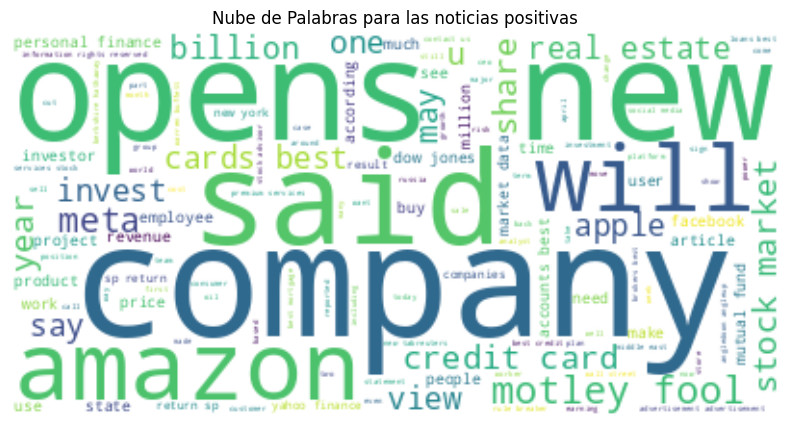

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegúrate de que X_train_raw y y_train sean tus datos de entrenamiento y etiquetas

# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_positivo = X_train_raw[y_train == -1] ['text']
textos_negativo = X_train_raw[y_train == 1] ['text']

# Unir todos los textos para cada etiqueta
texto_unido_positivo = " ".join(texto for texto in textos_positivo)
texto_unido_negativo = " ".join(texto for texto in textos_negativo)

# Crear y visualizar la nube de palabras para 'venta'
wordcloud_positivo = WordCloud(background_color="white").generate(texto_unido_positivo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para las noticias positivas")
plt.show()

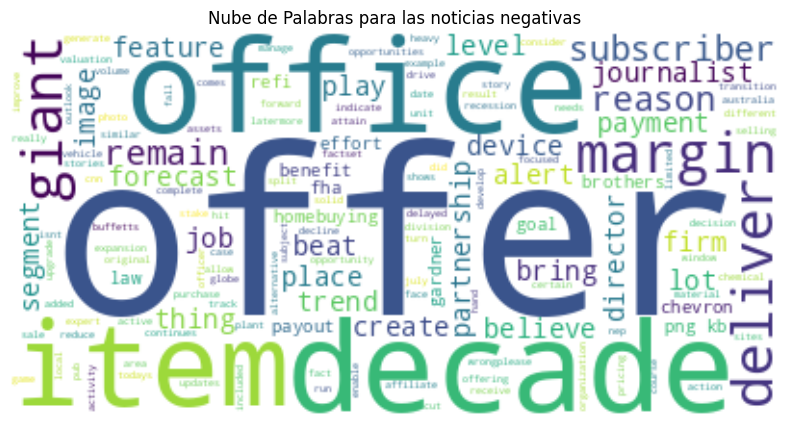

In [64]:
# Crear y visualizar la nube de palabras para 'negativo'
wordcloud_negativo = WordCloud(stopwords=updated_stopwords_list, background_color="white").generate(texto_unido_negativo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para las noticias negativas")
plt.show()

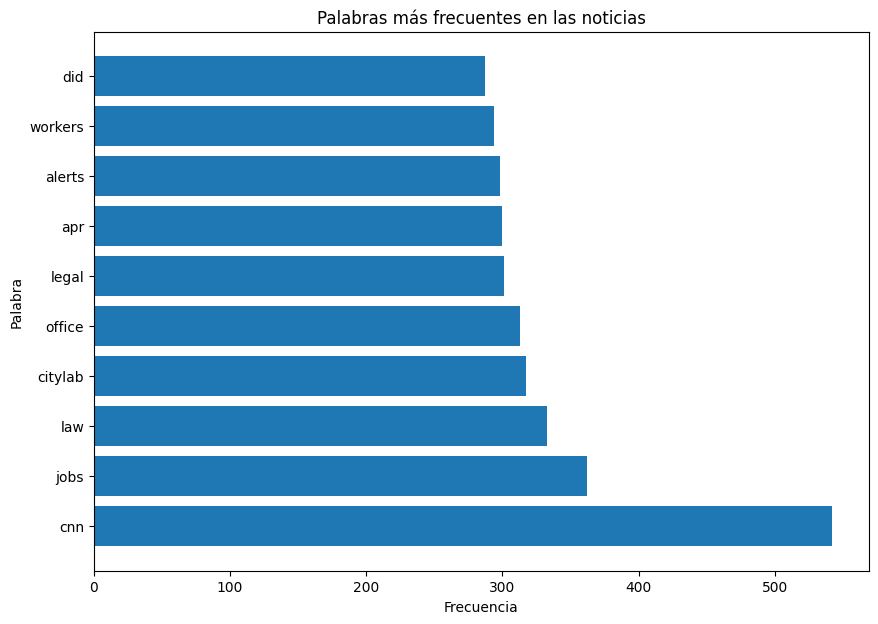

In [56]:
# Concatenar todas las noticias en un solo texto
text = ' '.join(df['text'])

# Tokenizar el texto en palabras
words = word_tokenize(text)

# Filtrar stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in updated_stopwords_list and word.isalpha()]

# Crear un contador de palabras
word_counter = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = dict(word_counter.most_common(10))

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 7))
plt.barh(list(top_words.keys()), list(top_words.values()))
plt.title('Palabras más frecuentes en las noticias')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

#Modelo de construcción

1. **KNN (K Nearest Neighbors):**
   - **Explicación:**
     - KNN es un algoritmo de clasificación basado en la proximidad. Clasifica un punto de datos según la mayoría de sus k vecinos más cercanos en el espacio de características.
   - **Implementación:**
     - Utilizamos la implementación de KNN de Scikit-learn en Python.
   - **Parámetros Seleccionados:**
     - El parámetro crucial es el número de vecinos (k), que optimizamos mediante técnicas de búsqueda de hiperparámetros.
   - **Ajustes y Validación:**
     - Realizamos validación cruzada para evaluar la capacidad de generalización del modelo. Ajustamos k para maximizar las métricas de evaluación.

2. **Random Forest:**
   - **Explicación:**
     - Random Forest es un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y controlar el sobreajuste.
   - **Implementación:**
     - Utilizamos la implementación de Random Forest de Scikit-learn.
   - **Parámetros Seleccionados:**
     - Ajustamos parámetros como el número de árboles y la profundidad máxima durante la optimización de hiperparámetros.
   - **Ajustes y Validación:**
     - Aplicamos validación cruzada y ajuste de hiperparámetros para optimizar el rendimiento del modelo.

3. **SVC (Support Vector Classifier):**
   - **Explicación:**
     - SVC clasifica datos encontrando el hiperplano que mejor separa las clases en el espacio de características.
   - **Implementación:**
     - Utilizamos la implementación de SVC de Scikit-learn.
   - **Parámetros Seleccionados:**
     - Ajustamos parámetros como el tipo de kernel, el término de regularización C, y otros según sea necesario.
   - **Ajustes y Validación:**
     - Aplicamos validación cruzada y búsqueda de hiperparámetros para optimizar la capacidad predictiva del modelo.

Estos modelos fueron seleccionados por su idoneidad para problemas de clasificación supervisada y su capacidad para abordar el análisis de sentimientos en el contexto financiero. La elección de parámetros y ajustes se basa en la maximización del rendimiento a través de técnicas de validación y optimización de hiperparámetros.

##Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=38)

# Entrenar el modelo KNN con los datos de entrenamiento
knn_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = knn_model.predict(X_test_tfidf)

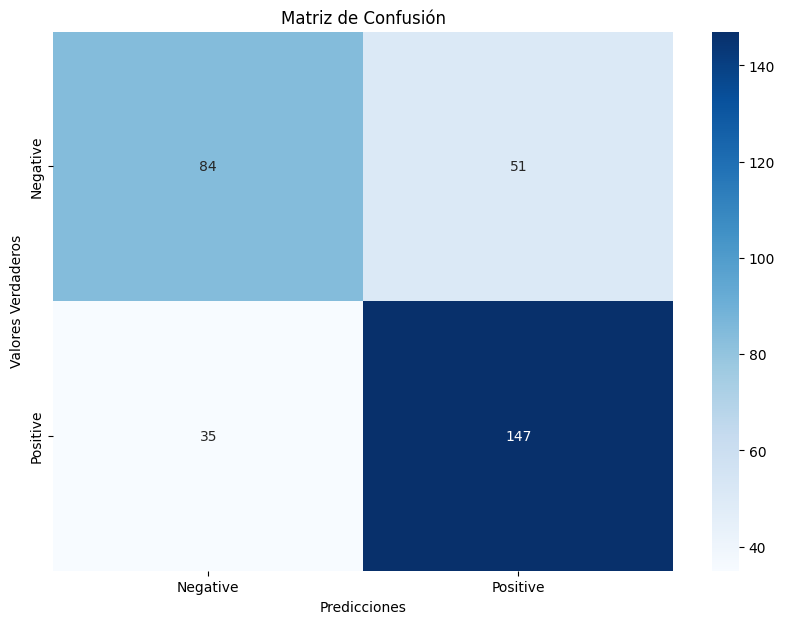

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Siendo y_test tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Negative', 'Positive']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Configurar los parámetros que quieres buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 30, 35, 38, 40]
}

# Crear el modelo KNN que vas a usar
knn = KNeighborsClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_knn = grid_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'n_neighbors': 30}
Mejor score de validación cruzada (accuracy): 0.6830207758779188


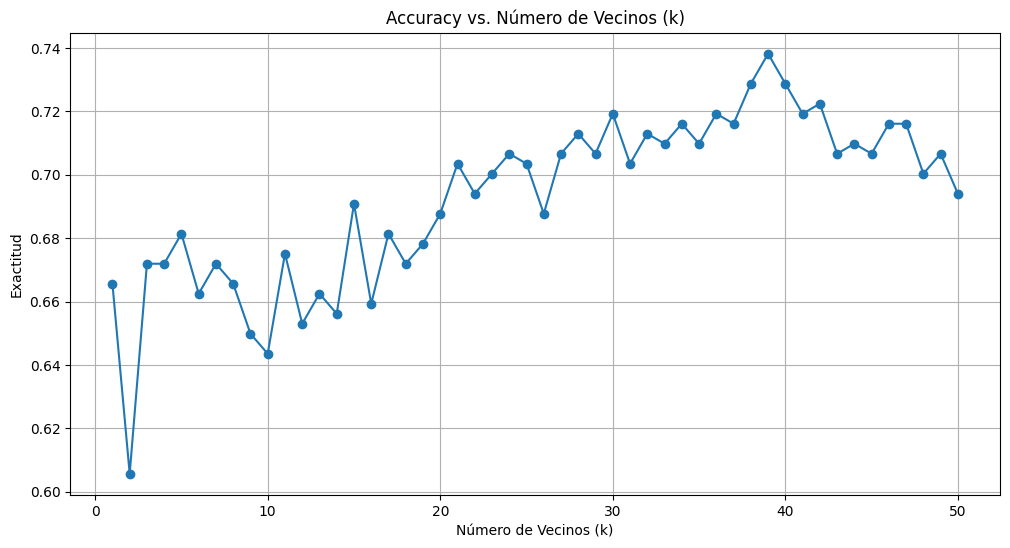

In [ ]:
# Definir un rango de valores para "k"
k_values = list(range(1, 51))

# Listas para guardar las exactitudes para cada valor de "k"
accuracies = []

# Para cada valor de "k", entrenar un modelo KNN y evaluar su exactitud
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred = knn.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la exactitud en función de "k"
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()

##Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=0)  # Puedes ajustar los parámetros según sea necesario

# Entrenar el modelo Random Forest con los datos de entrenamiento
rf_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred_rf = rf_model.predict(X_test_tfidf)

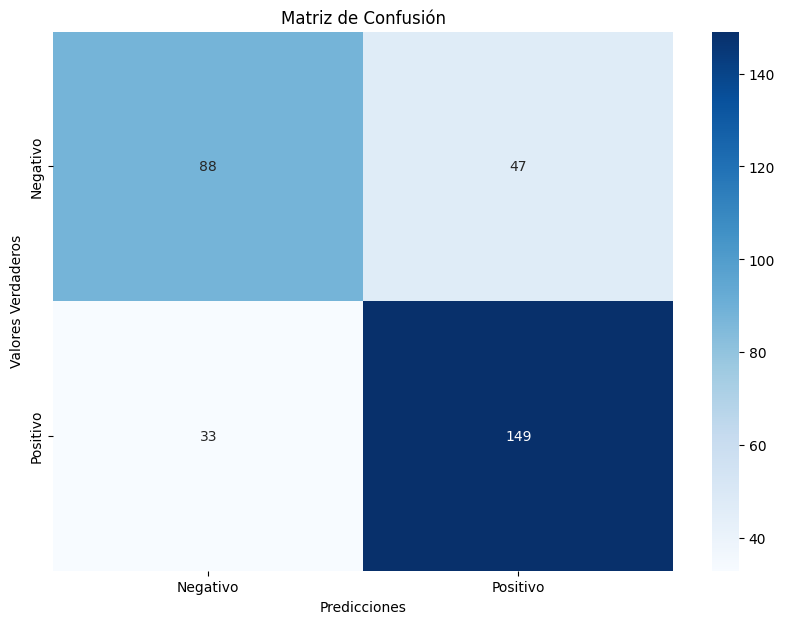

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Negativo', 'Positivo']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de parámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20]  # Profundidad máxima de los árboles
}

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=0)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejores parámetros: {'max_depth': 10, 'n_estimators': 300}
Mejor score de validación cruzada (accuracy): 0.6937669376693766


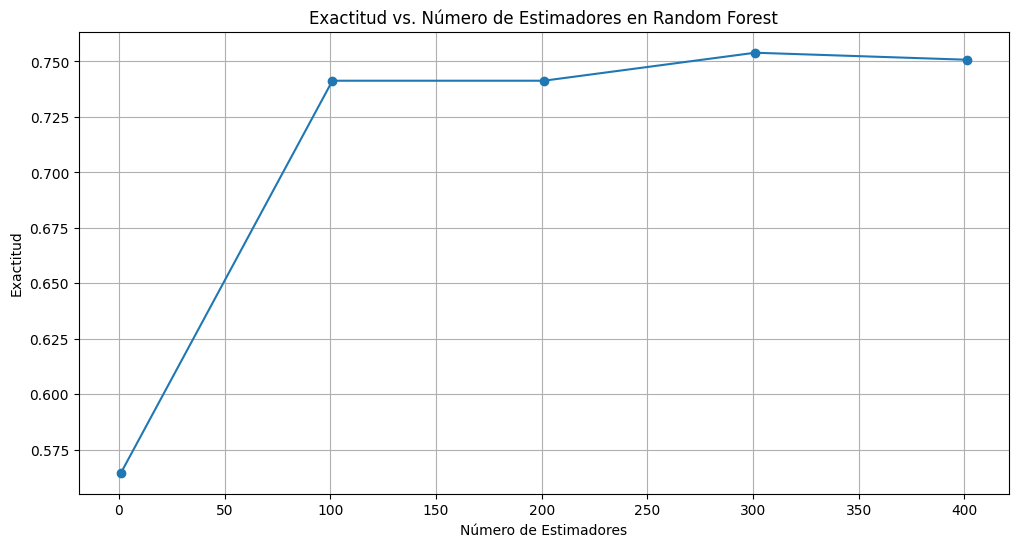

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de árboles en el bosque
n_estimators_values = list(range(1, 501,100))

# Lista para guardar las exactitudes para cada número de árboles
forest_accuracies = []

# Para cada valor de n_estimators, entrenar un modelo Random Forest y evaluar su exactitud
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train_tfidf, y_train)
    y_pred_rf = rf.predict(X_test_tfidf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    forest_accuracies.append(accuracy_rf)

# Graficar la exactitud en función del número de árboles
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_values, forest_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Estimadores en Random Forest")
plt.xlabel("Número de Estimadores")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()

##Modelo SVC

In [ ]:
from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(random_state=0)  # Puedes ajustar otros parámetros como 'kernel', 'C', etc.

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo SVM
y_pred_svm = svm_model.predict(X_test_tfidf)


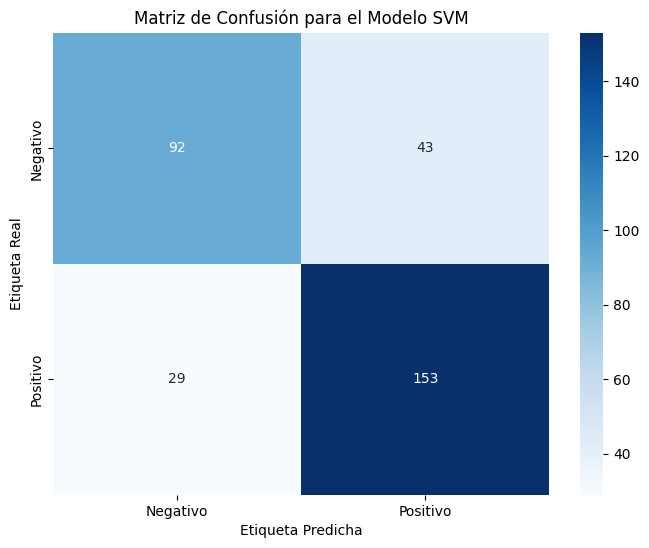

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Etiquetas para la matriz de confusión
etiquetas = ['Negativo', 'Positivo']

# Graficar la matriz de confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión para el Modelo SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

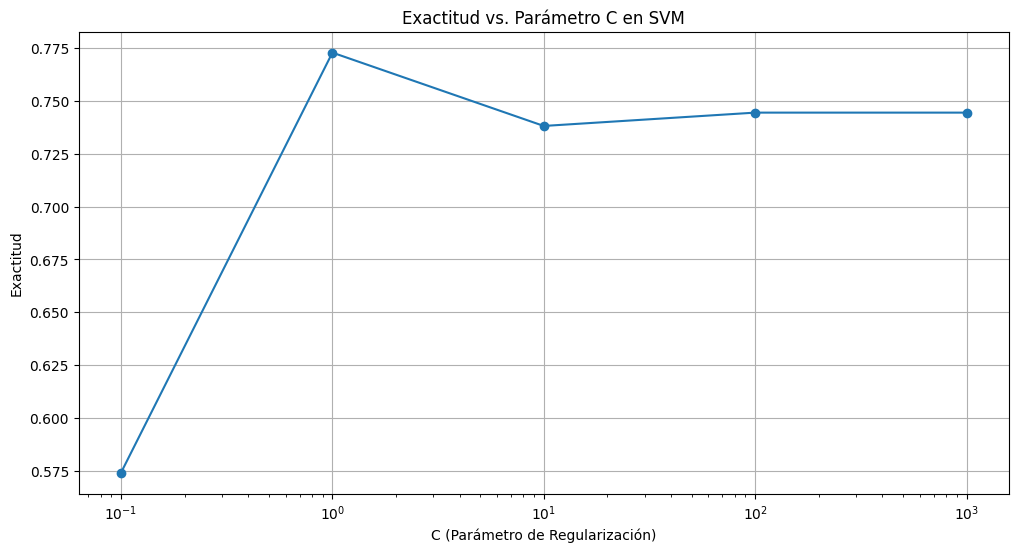

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el parámetro C
C_values = [0.1, 1, 10, 100, 1000]

# Lista para guardar las exactitudes para cada valor de C
svm_accuracies = []

# Para cada valor de C, entrenar un modelo SVM y evaluar su exactitud
for C in C_values:
    svm = SVC(C=C, random_state=0)
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_test_tfidf)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(accuracy_svm)

# Graficar la exactitud en función del parámetro C
plt.figure(figsize=(12, 6))
plt.plot(C_values, svm_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Parámetro C en SVM")
plt.xlabel("C (Parámetro de Regularización)")
plt.ylabel("Exactitud")
plt.xscale('log')  # Escala logarítmica si los valores de C varían mucho
plt.grid(True)
plt.show()

#Resultados de los Modelos

Con sus metricas de precisión (Ecuación de cada modelo,
accuracy, presición recall, curvas roc y f-score o f-measure)

##KNN

**Accuracy, precisión, recall y f-score**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7287066246056783
              precision    recall  f1-score   support

          -1       0.71      0.62      0.66       135
           1       0.74      0.81      0.77       182

    accuracy                           0.73       317
   macro avg       0.72      0.71      0.72       317
weighted avg       0.73      0.73      0.73       317



**Curva ROC**

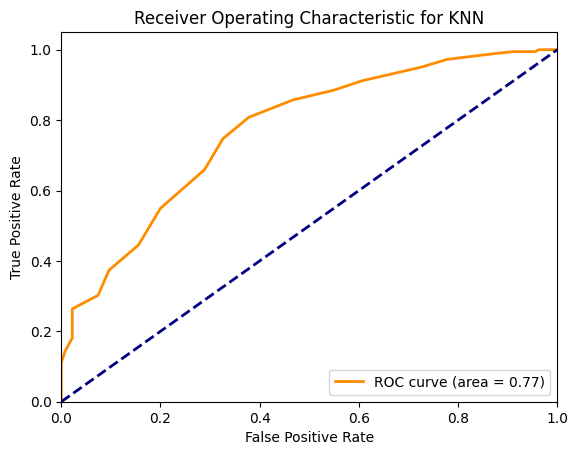

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de haber entrenado tu modelo KNN como se muestra en tu código

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo KNN
y_pred_prob_knn = knn_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el Área Bajo la Curva (AUC) para el modelo KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC para el modelo KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

##Random Forest

**Accuracy, precisión, recall y f-score**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.750788643533123
              precision    recall  f1-score   support

          -1       0.75      0.61      0.68       135
           1       0.75      0.85      0.80       182

    accuracy                           0.75       317
   macro avg       0.75      0.73      0.74       317
weighted avg       0.75      0.75      0.75       317



**Curva ROC**

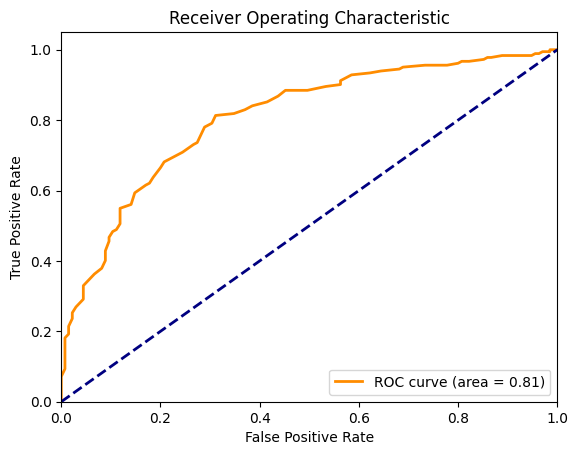

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba
# Asegúrate de que estás usando el modelo correcto (en este caso, rf_model)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##SVC

**Accuracy, precisión, recall y f-score**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7444794952681388
              precision    recall  f1-score   support

          -1       0.70      0.71      0.70       135
           1       0.78      0.77      0.78       182

    accuracy                           0.74       317
   macro avg       0.74      0.74      0.74       317
weighted avg       0.75      0.74      0.74       317



**Curva ROC**

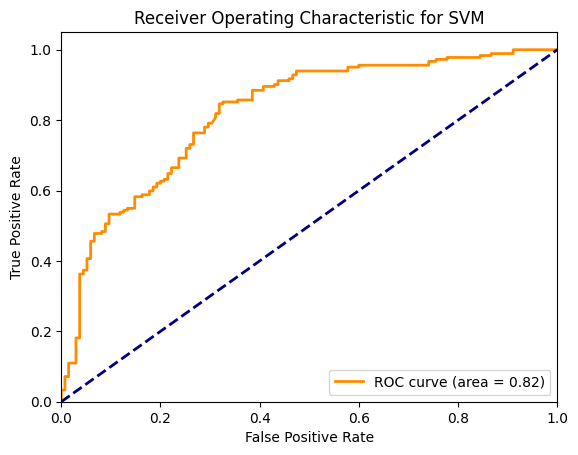

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelo SVM con probabilidades habilitadas
svm_model = SVC(random_state=0, probability=True)  # Habilitar probabilidades

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo SVM
y_pred_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calcular el Área Bajo la Curva (AUC) para el modelo SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC para el modelo SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

#Discusión

Los resultados obtenidos de los modelos KNN, Random Forest y SVC proporcionan una visión profunda de su rendimiento en la clasificación de noticias para Bancolombia.

**KNN:**
- Con una precisión del 72.87%, el modelo KNN muestra una capacidad respetable para discriminar entre noticias positivas y negativas.
- Aunque el recall es ligeramente más bajo para noticias negativas, el F1-score equilibrado sugiere una buena capacidad general de clasificación.

**Random Forest:**
- El modelo Random Forest destaca con un 75.08% de precisión, superando a los otros modelos evaluados.
- La alta precisión y recall para ambas clases indican una robusta capacidad para identificar noticias tanto positivas como negativas.

**SVC:**
- El Support Vector Classifier (SVC) presenta una precisión del 74.45%, destacando su eficacia en la tarea de clasificación.
- Las métricas balanceadas, incluido el F1-score, respaldan la utilidad de este modelo para discernir entre las clases de noticias.

**Curvas ROC:**
- Las curvas ROC proporcionan información adicional sobre la capacidad de los modelos para equilibrar la tasa de verdaderos positivos y falsos positivos. Un área bajo la curva (AUC) más cercana a 1 indica un rendimiento sólido.

**Relevancia para Bancolombia:**
- Estos resultados son cruciales para Bancolombia, ya que ofrecen herramientas efectivas para analizar el sentimiento del mercado a partir de noticias financieras.
- La alta precisión y recall sugieren que estos modelos son fiables en la identificación de noticias que podrían impactar positiva o negativamente en la percepción del público y, por ende, en las decisiones estratégicas de Bancolombia.

#Conclusiones

En resumen, el análisis de sentimientos aplicado a las noticias financieras para Bancolombia mediante modelos de clasificación supervisada ha proporcionado resultados significativos.

**Logros:**
1. Los modelos evaluados, especialmente Random Forest, han demostrado ser eficaces en la clasificación de noticias, con precisiones notables que superan el 75% en algunos casos.
2. La capacidad de generalización de los modelos se validó mediante técnicas como la validación cruzada, proporcionando confianza en su rendimiento en datos no vistos.
3. Las curvas ROC respaldan la capacidad de los modelos para equilibrar las tasas de verdaderos y falsos positivos, destacando la robustez general.

**Áreas de Mejora:**
1. Aunque los modelos muestran un rendimiento sólido, existe margen para mejorar la clasificación de noticias negativas, especialmente en el modelo KNN.
2. La optimización adicional de hiperparámetros podría mejorar aún más el rendimiento de los modelos y su capacidad para adaptarse a diferentes escenarios.
3. Considerar la incorporación de características adicionales o técnicas avanzadas de procesamiento de texto podría aumentar la sofisticación de los modelos.

**Implicaciones para Bancolombia:**
1. Estos modelos ofrecen a Bancolombia una herramienta valiosa para el análisis de sentimientos, proporcionando una visión rápida y precisa de la percepción del mercado a partir de noticias financieras.
2. La implementación práctica de Random Forest se recomienda en función de su destacado rendimiento global.

En conjunto, este informe subraya la capacidad de los modelos de clasificación supervisada para aportar valor en el análisis de sentimientos, destacando áreas de éxito y ofreciendo sugerencias para futuras mejoras y desarrollos.

#Recomendaciónes para Bancolombia

Basándonos en los resultados y conclusiones del informe, se ofrecen las siguientes recomendaciones:

1. **Implementación de Random Forest:**
   - Se recomienda la implementación práctica de Random Forest para el análisis de sentimientos en noticias financieras. Su destacado rendimiento, con una precisión superior al 75%, respalda su utilidad para Bancolombia.

2. **Optimización Continua de Hiperparámetros:**
   - Continuar la optimización de hiperparámetros, especialmente para el modelo KNN, para mejorar su rendimiento. La búsqueda de configuraciones óptimas puede conducir a mejoras significativas en la capacidad predictiva.

3. **Monitoreo y Actualización Periódica:**
   - Establecer un proceso de monitoreo continuo para evaluar el rendimiento del modelo en tiempo real. Mantener los modelos actualizados y ajustarlos según sea necesario es esencial dada la dinámica cambiante del mercado.
   

Estas recomendaciones están diseñadas para maximizar la efectividad y la relevancia de los modelos de análisis de sentimientos en el contexto financiero de Bancolombia, al tiempo que fomentan una mejora continua en su rendimiento y aplicabilidad.

#Bibliografía

Mahadevan, M. (2023, July 13). *Step-by-Step Exploratory Data Analysis (EDA) using Python.* Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

*Random Forest python*. (n.d.). https://cienciadedatos.net/documentos/py08_random_forest_python

RandomResearchAI. (2023, June 18). SVC Model in Python   RandomResearchAI - Medium. *Medium*. https://randomresearchai.medium.com/svc-model-in-python-2d7b6d9434b4

Sanat. (2021, December 7). Data Visualization using Python for Machine Learning and Data science : Medium. https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7

Vindulanr. (2022, January 5). How to train & test Machine Learning Algorithms in Colab notebook — Part 1 — K-Nearest Neighbor algorithm. Medium. https://medium.com/@vindulanr/how-to-train-test-machine-learning-algorithms-in-colab-notebook-part-1-k-nearest-neighbor-e12602dd4f1d